Imports

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 14 09:54:28 2021

Clustering exercise using fish measurements

@author: napi
"""

import pandas as pd
import numpy as np

import sklearn.cluster as cluster
import sklearn.metrics as skmet

import matplotlib.pyplot as plt
import cluster_tools as ct
#import map

%matplotlib inline

Inspecting the module.

In [ ]:
help(ct)

Read in and inspect

In [4]:
# reading the file and basic statistics
df_fish = pd.read_csv("fish_measurements.csv", skiprows=(1,2))
print(df_fish.describe())
print()


            weight  lower jaw fork length  fork length  total length  \
count    84.000000              84.000000    84.000000     84.000000   
mean    436.005952              27.383333    29.609524     33.182143   
std     380.942954              11.349750    12.248783     13.264039   
min       6.700000               9.300000     9.800000     10.800000   
25%     120.000000              19.325000    20.950000     23.550000   
50%     390.000000              28.450000    30.850000     35.050000   
75%     657.500000              32.725000    36.000000     40.675000   
max    1650.000000              59.000000    63.400000     68.000000   

          height      width  
count  84.000000  84.000000  
mean   28.108333  12.852381  
std    10.409521   2.126509  
min    14.500000   8.700000  
25%    16.875000  10.875000  
50%    27.200000  13.700000  
75%    39.225000  14.700000  
max    44.500000  16.100000  



Display heatmap and scatter plot.

The `coolwarm` colour map is used by the mapper. This and a few other colour maps.
![Colour maps](div_colormaps.png)

Combinations of columns with light blue or light red are good.

   species  weight  lower jaw fork length  fork length  total length  height  \
79    Pike   950.0                   48.3         51.7          55.1    16.2   
80   Bream   725.0                   31.8         35.0          40.9    40.0   
81   Bream   242.0                   23.2         25.4          30.0    38.4   
82   Bream   500.0                   29.1         31.5          36.4    37.8   
83   Smelt     8.7                   10.8         11.3          12.6    15.7   

    width  
79   11.2  
80   14.8  
81   13.4  
82   12.0  
83   10.2  


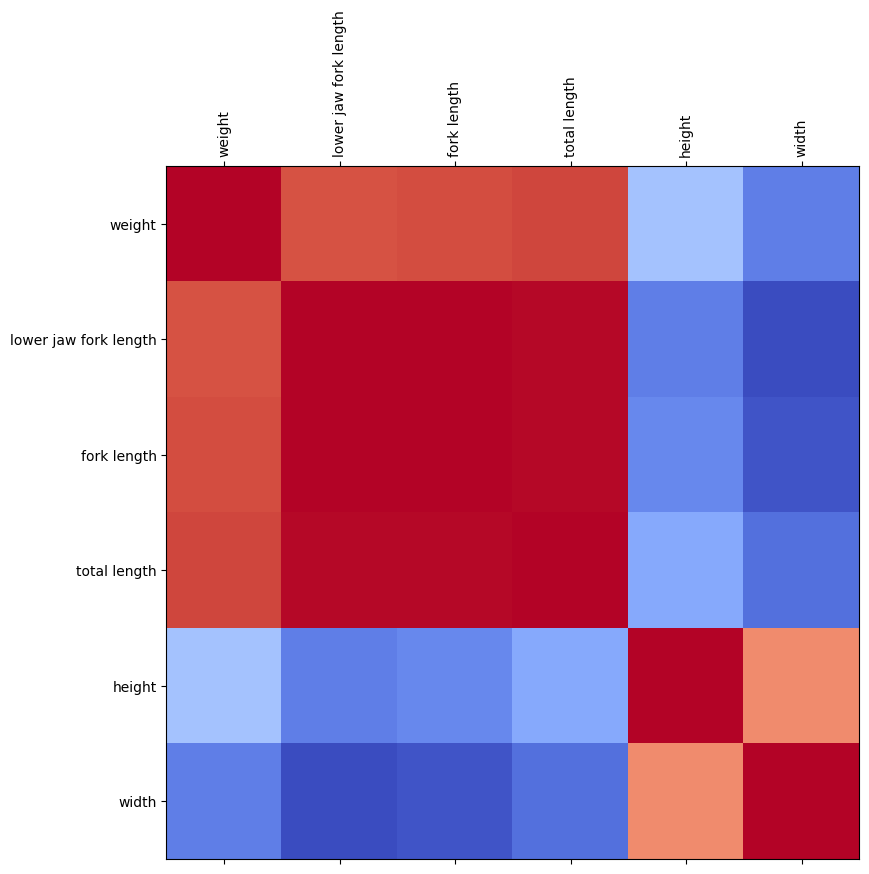

In [11]:
print(df_fish.tail(5))
#print(df_fish.corr())

# # heatmap
ct.map_corr(df_fish, 9)

# # scatter plot
# pd.plotting.scatter_matrix(df_fish, figsize=(9.0, 9.0))
# plt.tight_layout()    # helps to avoid overlap of labels
# plt.show()

Total length vs. height splits has a low-ish correlation. The scatter plot confirms that this is a good choice. Picking that combination. 

Setting up and executing kmeans clustering. Running a loop iterating the number of clusters and calculate the silouette score.

In [ ]:
# extract columns for fitting. 
# .copy() prevents changes in df_fit to affect df_fish.
df_fit = df_fish[["total length", "height"]].copy()

# normalise dataframe and inspect result
# normalisation is done only on the extract columns. .copy() prevents
# changes in df_fit to affect df_fish. This make the plots with the 
# original measurements
df_fit, df_min, df_max = ct.scaler(df_fit)
print(df_fit.describe())
print()

print("n   score")
# loop over trial numbers of clusters calculating the silhouette
for ic in range(2, 7):
    # set up kmeans and fit
    kmeans = cluster.KMeans(n_clusters=ic)
    kmeans.fit(df_fit)     

    # extract labels and calculate silhoutte score
    labels = kmeans.labels_
    print (ic, skmet.silhouette_score(df_fit, labels))
    
    

Good results for 4 and 5 clusters. Plot both. Use the scatter plot for colouring the sysmbols.

In [ ]:
# Plot for four clusters
nc = 4 # number of cluster centres

kmeans = cluster.KMeans(n_clusters=nc)
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

plt.figure(figsize=(6.0, 6.0))
# scatter plot with colours selected using the cluster numbers
plt.scatter(df_fit["total length"], df_fit["height"], c=labels, cmap="tab10")
# colour map Accent selected to increase contrast between colours

# show cluster centres
xc = cen[:,0]
yc = cen[:,1]
plt.scatter(xc, yc, c="k", marker="d", s=80)
# c = colour, s = size

plt.xlabel("total length")
plt.ylabel("height")
plt.title("4 clusters")
plt.show()

#----------------------------
# Plot for five clusters
nc = 5 # number of cluster centres

kmeans = cluster.KMeans(n_clusters=nc)
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

plt.figure(figsize=(6.0, 6.0))
# scatter plot with colours selected using the cluster numbers
plt.scatter(df_fit["total length"], df_fit["height"], c=labels, cmap="tab10")
# colour map Accent selected to increase contrast between colours

# show cluster centres
xc = cen[:,0]
yc = cen[:,1]
plt.scatter(xc, yc, c="k", marker="d", s=80)

plt.xlabel("total length")
plt.ylabel("height")
plt.title("5 clusters")
plt.show()



Using 5 clusters splits the bottom right cluster. The 4 cluster solution looks more plausible. The distinction between cluster 4 and 5 is much smaller than between all the other cluster combinations.

Note that cluster centres are initialised randomly. Results can differ. Consider rerunning if result does not look satisfactory.

#### Now plot it on the original scale

In [ ]:
nc = 4 # number of cluster centres

kmeans = cluster.KMeans(n_clusters=nc)
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

plt.figure(figsize=(6.0, 6.0))
# scatter plot with colours selected using the cluster numbers
# now using the original dataframe
plt.scatter(df_fish["total length"], df_fish["height"], c=labels, cmap="tab10")
# colour map Accent selected to increase contrast between colours

# rescale and show cluster centres
scen = ct.backscale(cen, df_min, df_max)
xc = scen[:,0]
yc = scen[:,1]
plt.scatter(xc, yc, c="k", marker="d", s=80)

plt.xlabel("total length")
plt.ylabel("height")
plt.title("4 clusters")
plt.show()

